In [1]:
!python -m pip uninstall pytorch -y
!python -m pip uninstall torchvision -y
!python -m pip uninstall torchaudio -y
#!python -m pip uninstall fastai -y # fastai 2.7.10 requires torch<1.14,>=1.7

!python -m pip install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu116

Found existing installation: torchvision 0.13.0+cu116
Uninstalling torchvision-0.13.0+cu116:
  Successfully uninstalled torchvision-0.13.0+cu116
Found existing installation: torchaudio 0.12.0+cu116
Uninstalling torchaudio-0.12.0+cu116:
  Successfully uninstalled torchaudio-0.12.0+cu116
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.3/994.3 kB 26.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 806.9 kB/s eta 0:00:000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 60.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 50.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu116
    Uninstalling torch-1.12.0+cu116:
      Successfully uninstalled torch-1.12.0+cu116


In [8]:
!python -m pip install "git+https://github.com/facebookresearch/detectron2.git"

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-vrx6xbbh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-vrx6xbbh
  Resolved https://github.com/facebookresearch/detectron2.git to commit 96c752ce821a3340e27edd51c28a00665dd32a30
  Preparing metadata (setup.py) ... done
  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached fvcore-0.1.5.post20221122.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
  Using cached iopath-0.1.9-py3-none-any.whl (27 kB)
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
  Using cached omegaconf-2.2.3-py3-none-any.whl (79 kB)
  Using cached hydra_core-1.2.0-py3-none-any.whl (151 kB)
  Using cac

In [9]:
!python -m pip install "git+https://github.com/facebookresearch/mobile-vision.git"

  Cloning https://github.com/facebookresearch/mobile-vision.git to /tmp/pip-req-build-bkg5qcm2
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/mobile-vision.git /tmp/pip-req-build-bkg5qcm2
  Resolved https://github.com/facebookresearch/mobile-vision.git to commit dad085238c64e44a3ae4236a13b99e10b780aad4
  Preparing metadata (setup.py) ... done


In [11]:
!python -m pip install "git+https://github.com/facebookresearch/d2go.git"

  Cloning https://github.com/facebookresearch/d2go.git to /tmp/pip-req-build-txbo5wh5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/d2go.git /tmp/pip-req-build-txbo5wh5
  Resolved https://github.com/facebookresearch/d2go.git to commit 1a75101f2c68fcba10fb3be1f8422c607dbb9dcb
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/PyTorchLightning/pytorch-lightning (to revision 9b011606f) to /tmp/pip-install-01puusoh/pytorch-lightning_d7efe297da184af8b4b8782ba143b01a
  Running command git clone --filter=blob:none --quiet https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-install-01puusoh/pytorch-lightning_d7efe297da184af8b4b8782ba143b01a
  Running command git checkout -q 9b011606f
  Resolved https://github.com/PyTorchLightning/pytorch-lightning to commit 9b011606f
  Running command git submodule update --init --recursive -q
  From https://github.com/PyTorchLightning/lightning-tutorials
   * branch            290fb466

In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.14 ; cuda:  cu116
detectron2: 0.6


In [2]:
import cv2
from matplotlib import pyplot as plt

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from d2go.model_zoo import model_zoo

In [3]:
import os
from detectron2.data.datasets import register_coco_instances

register_coco_instances("train", {}, "./f-s2v1/train/_annotations.coco.json", "./f-s2v1/train")
register_coco_instances("val", {}, "./f-s2v1/valid/_annotations.coco.json", "./f-s2v1/valid")
register_coco_instances("test", {}, "./f-s2v1/test/_annotations.coco.json", "./f-s2v1/test")

WARNING [11/25 18:33:33 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/25 18:33:33 d2.data.datasets.coco]: Loaded 99 images in COCO format from ./f-s2v1/train/_annotations.coco.json


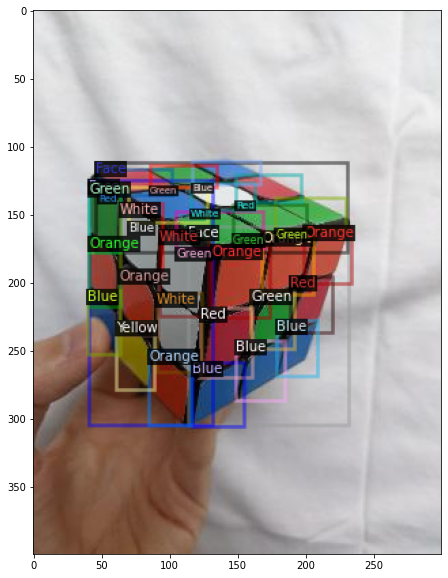

In [5]:
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
plt.rcParams["figure.figsize"] = (20,10)

#visualize training data
train_metadata = MetadataCatalog.get("train")
dataset_dicts = DatasetCatalog.get("train")

import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])

In [36]:
from d2go.runner import GeneralizedRCNNRunner
import pkg_resources

config_file = "./configs/faster_rcnn_fbnetv3a_C4.yaml"

def prepare_for_launch():
    runner = GeneralizedRCNNRunner()
    cfg = runner.get_default_cfg()
    cfg.merge_from_file(config_file)
    cfg.MODEL_EMA.ENABLED = False
    cfg.DATASETS.TRAIN = ("train",)
    cfg.DATASETS.TEST = ("val",)
    cfg.DATALOADER.NUM_WORKERS = 4 # 4
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("faster_rcnn_fbnetv3a_C4.yaml")  # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 6 
    cfg.SOLVER.BASE_LR = 0.00025 # 0.001?
    cfg.SOLVER.MAX_ITER = 2500 # 2000?
    cfg.SOLVER.STEPS = []        
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512 # 512   
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8
    cfg.OUTPUT_DIR = './'
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    return cfg, runner

cfg, runner = prepare_for_launch()


In [ ]:
model = runner.build_model(cfg)
runner.do_train(cfg, model, resume=False)

In [7]:
metrics = runner.do_test(cfg, model)

NameError: name 'model' is not defined

In [ ]:
%load_ext tensorboard
%tensorboard --logdir cfg.OUTPUT_DIR

INFO:d2go.modeling.backbone.fbnet_v2:Build FBNet using unified arch_def:
trunk
- {'block_op': 'conv_k3', 'block_cfg': {'out_channels': 16, 'stride': 2}, 'stage_idx': 0, 'block_idx': 0}
- {'block_op': 'ir_k3', 'block_cfg': {'out_channels': 16, 'stride': 1, 'expansion': 1, 'less_se_channels': False}, 'stage_idx': 0, 'block_idx': 1}
- {'block_op': 'ir_k3', 'block_cfg': {'out_channels': 16, 'stride': 1, 'expansion': 1, 'less_se_channels': False}, 'stage_idx': 0, 'block_idx': 2}
- {'block_op': 'ir_k5', 'block_cfg': {'out_channels': 24, 'stride': 2, 'expansion': 4, 'less_se_channels': False}, 'stage_idx': 1, 'block_idx': 0}
- {'block_op': 'ir_k5', 'block_cfg': {'out_channels': 24, 'stride': 1, 'expansion': 3, 'less_se_channels': False}, 'stage_idx': 1, 'block_idx': 1}
- {'block_op': 'ir_k5', 'block_cfg': {'out_channels': 24, 'stride': 1, 'expansion': 3, 'less_se_channels': False}, 'stage_idx': 1, 'block_idx': 2}
- {'block_op': 'ir_k5', 'block_cfg': {'out_channels': 24, 'stride': 1, 'expansio

[11/25 18:44:33 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                                        | Names in Checkpoint                                                                                                     | Shapes                             |
|:----------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------|:-----------------------------------|
| backbone.body.trunk0.fbnetv2_0_0.bn.*                                 | backbone.body.trunk0.fbnetv2_0_0.bn.{bias,num_batches_tracked,running_mean,running_var,weight}                          | (16,) () (16,) (16,) (16,)         |
| backbone.body.trunk0.fbnetv2_0_0.conv.*                               | backbone.body.trunk0.fbnetv2_0_0.conv.{bias,weight}                                                                     | (16,) (16,3,3,3)  

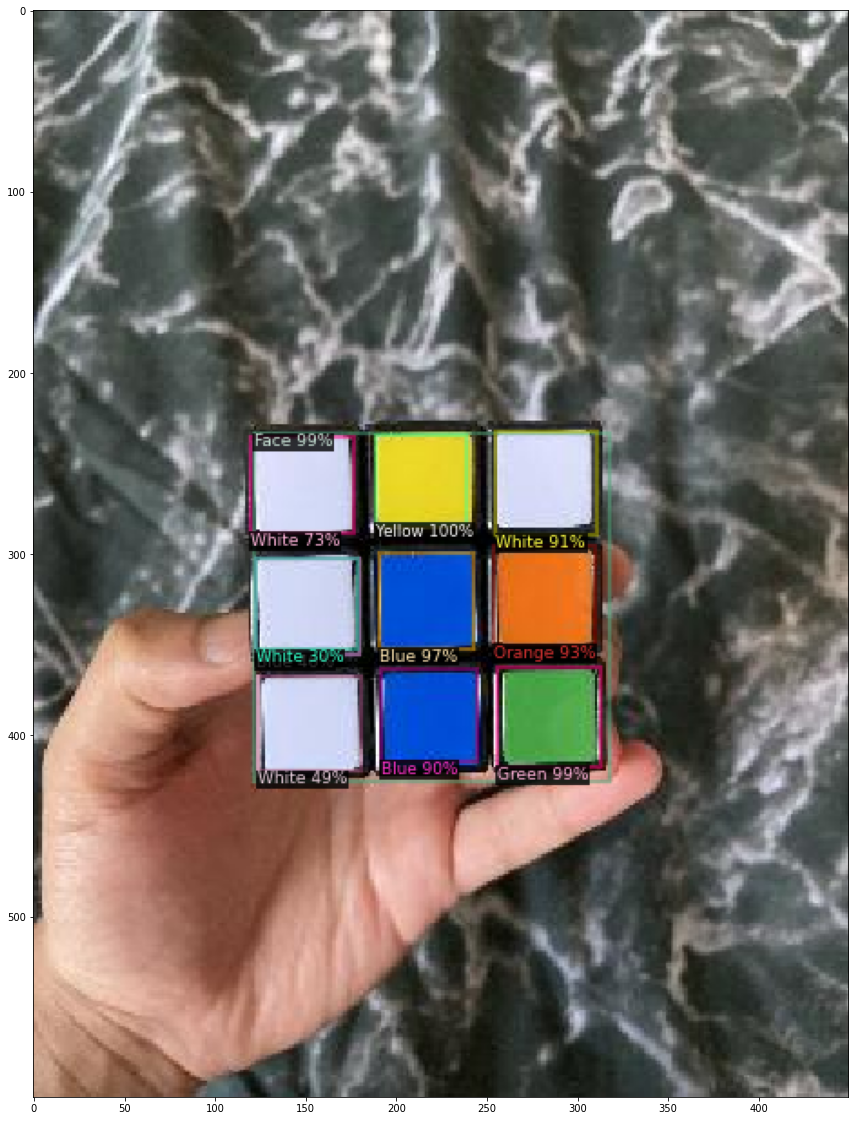

In [39]:
from detectron2.engine import DefaultPredictor
from d2go.runner import GeneralizedRCNNRunner
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
plt.rcParams["figure.figsize"] = (20,20)

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final_d2go.pth")
cfg.DATASETS.TEST = ("test", )
cfg.MODEL.DEVICE = "cpu"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3  # set the testing threshold for this model

predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("test")
dataset_dicts = DatasetCatalog.get("test")

import random

for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1],
                  metadata=test_metadata, 
                  scale=1.5
                    )
    print(outputs["instances"])
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    out = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
    plt.imshow(out)